In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.7
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_10_51_300_0.7_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_10_51_300_0.7_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	566.4633

Best Fitness:	180.6183
Solution:	100.0000
Diff:		80.6183

[0:04:26][----------] 1.96% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	655.9583

Best Fitness:	271.8863
Solution:	100.0000
Diff:		171.8863

[0:08:43][----------] 3.92% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	665.3839

Best Fitness:	177.5247
Solution:	100.0000
Diff:		77.5247

[0:12:59][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1094.3510

Best Fitness:	373.9781
Solution:	100.0000
Diff:		273.9781

[0:17:11][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1306.4030

Best Fitness:	385.6040
Solution:	100.0000
Diff:		285.6040

[0:21:28][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	899.4763

Best Fitness:	211.1215
Solution:	100.0000
Diff:		111.1215

[0:25:39][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	438.8830

Best Fitness:	180.3038
Solution:	100.0000
Diff:		80.3038

[0:29:33][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1160.3285

Best Fitness:	391.5047
Solution:	100.0000
Diff:		291.5047

[0:33:17][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1087.4902

Best Fitness:	219.1529
Solution:	100.0000
Diff:		119.1529

[0:37:00][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1297.2347

Best Fitness:	414.7067
Solution:	100.0000
Diff:		314.7067

[0:40:44][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1005.8469

Best Fitness:	355.5779
Solution:	100.0000
Diff:		255.5779

[0:44:28][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	606.5673

Best Fitness:	198.5574
Solution:	100.0000
Diff:		98.5574

[0:48:13][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	419.2369

Best Fitness:	187.6256
Solution:	100.0000
Diff:		87.6256

[0:52:06][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1216.3233

Best Fitness:	413.8430
Solution:	100.0000
Diff:		313.8430

[0:55:51][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	301.2660

Best Fitness:	164.8868
Solution:	100.0000
Diff:		64.8868

[0:59:09][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	381.7997

Best Fitness:	163.7258
Solution:	100.0000
Diff:		63.7258

[1:02:31][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1491.4947

Best Fitness:	267.8502
Solution:	100.0000
Diff:		167.8502

[1:05:48][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	477.2200

Best Fitness:	186.2478
Solution:	100.0000
Diff:		86.2478

[1:09:06][####------] 35.29% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	842.9334

Best Fitness:	309.7684
Solution:	100.0000
Diff:		209.7684

[1:12:25][####------] 37.25% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1044.3528

Best Fitness:	351.2380
Solution:	100.0000
Diff:		251.2380

[1:15:43][####------] 39.22% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1065.2140

Best Fitness:	406.9566
Solution:	100.0000
Diff:		306.9566

[1:19:01][####------] 41.18% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1002.5710

Best Fitness:	411.7715
Solution:	100.0000
Diff:		311.7715

[1:22:12][####------] 43.14% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1821.3208

Best Fitness:	523.0540
Solution:	100.0000
Diff:		423.0540

[1:25:08][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	831.1692

Best Fitness:	299.9665
Solution:	100.0000
Diff:		199.9665

[1:28:10][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	845.9679

Best Fitness:	308.7032
Solution:	100.0000
Diff:		208.7032

[1:31:04][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	512.9459

Best Fitness:	203.8003
Solution:	100.0000
Diff:		103.8003

[1:33:59][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	616.4690

Best Fitness:	277.6892
Solution:	100.0000
Diff:		177.6892

[1:36:55][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	441.7889

Best Fitness:	183.1493
Solution:	100.0000
Diff:		83.1493

[1:39:50][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	742.0037

Best Fitness:	215.7940
Solution:	100.0000
Diff:		115.7940

[1:42:50][######----] 56.86% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1137.8311

Best Fitness:	367.7756
Solution:	100.0000
Diff:		267.7756

[1:45:27][######----] 58.82% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	960.4134

Best Fitness:	293.4372
Solution:	100.0000
Diff:		193.4372

[1:48:01][######----] 60.78% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	885.1248

Best Fitness:	316.0929
Solution:	100.0000
Diff:		216.0929

[1:50:36][######----] 62.75% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	672.4349

Best Fitness:	257.1975
Solution:	100.0000
Diff:		157.1975

[1:53:11][######----] 64.71% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	673.7703

Best Fitness:	230.4719
Solution:	100.0000
Diff:		130.4719

[1:55:46][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1049.6651

Best Fitness:	366.2468
Solution:	100.0000
Diff:		266.2468

[1:58:20][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1217.5084

Best Fitness:	490.8716
Solution:	100.0000
Diff:		390.8716

[2:00:51][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1144.3959

Best Fitness:	357.6803
Solution:	100.0000
Diff:		257.6803

[2:03:14][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	910.7848

Best Fitness:	365.7949
Solution:	100.0000
Diff:		265.7949

[2:05:31][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	749.5578

Best Fitness:	224.5371
Solution:	100.0000
Diff:		124.5371

[2:07:55][########--] 76.47% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	495.0784

Best Fitness:	179.9798
Solution:	100.0000
Diff:		79.9798

[2:10:14][########--] 78.43% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	892.7233

Best Fitness:	325.6072
Solution:	100.0000
Diff:		225.6072

[2:12:31][########--] 80.39% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	766.1488

Best Fitness:	250.7980
Solution:	100.0000
Diff:		150.7980

[2:14:48][########--] 82.35% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	753.6374

Best Fitness:	258.5030
Solution:	100.0000
Diff:		158.5030

[2:17:15][########--] 84.31% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	2524.5768

Best Fitness:	708.8095
Solution:	100.0000
Diff:		608.8095

[2:19:58][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	962.0412

Best Fitness:	336.5636
Solution:	100.0000
Diff:		236.5636

[2:22:28][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	539.1505

Best Fitness:	244.5084
Solution:	100.0000
Diff:		144.5084

[2:24:40][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	651.9242

Best Fitness:	235.0253
Solution:	100.0000
Diff:		135.0253

[2:26:43][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1755.6365

Best Fitness:	445.4748
Solution:	100.0000
Diff:		345.4748

[2:28:45][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	575.3190

Best Fitness:	187.8113
Solution:	100.0000
Diff:		87.8113

[2:30:46][##########] 96.08% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	769.5572

Best Fitness:	229.0569
Solution:	100.0000
Diff:		129.0569

[2:32:48][##########] 98.04% 

Optimization ended due to max fitness evals (max = 70000.0, curr = 69900)


#Generations:	231

#FitnessEvals:	69900

Mean Fitness:	1245.2935

Best Fitness:	317.1342
Solution:	100.0000
Diff:		217.1342

[2:34:55][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

2:34:55

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
226,926.654973,1126.841028,829.018319,636.041333,700.522885,1100.146745,857.009047,882.404727,1301.066891,1790.251936,...,1772.197525,1021.053411,593.247351,1581.147067,1317.191787,815.233252,599.654365,2736.967541,1154.526521,50
227,926.654973,1126.841028,718.395861,636.041333,700.522885,1100.146745,857.009047,882.404727,1301.066891,1790.251936,...,1772.197525,1021.053411,593.247351,1581.147067,1317.191787,815.233252,599.654365,2219.528400,1154.526521,50
228,926.654973,1126.841028,718.395861,636.041333,700.522885,1100.146745,857.009047,882.404727,1301.066891,1446.333571,...,1772.197525,1021.053411,593.247351,1581.147067,1317.191787,815.233252,599.654365,1401.788270,1154.526521,50
229,926.654973,1126.841028,718.395861,636.041333,700.522885,1100.146745,857.009047,882.404727,1301.066891,993.204138,...,1772.197525,1021.053411,593.247351,1581.147067,1317.191787,815.233252,599.654365,1401.788270,1154.526521,50
230,926.654973,1126.841028,718.395861,636.041333,700.522885,871.666188,857.009047,882.404727,1301.066891,993.204138,...,872.922412,1021.053411,593.247351,1581.147067,1317.191787,815.233252,599.654365,1401.788270,1154.526521,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 80.61825579389148

Best error for run 1: 171.88632544522522

Best error for run 2: 77.52470017714776

Best error for run 3: 273.97808828198686

Best error for run 4: 285.60395244575807

Best error for run 5: 111.12146900697678

Best error for run 6: 80.30382468991712

Best error for run 7: 291.5046676109368

Best error for run 8: 119.15288537605198

Best error for run 9: 314.7067495459728

Best error for run 10: 255.57790747227688

Best error for run 11: 98.55738545233959

Best error for run 12: 87.62561958662872

Best error for run 13: 313.84300054636424

Best error for run 14: 64.88680891562348

Best error for run 15: 63.725803662488346

Best error for run 16: 167.85023879504212

Best error for run 17: 86.24780145310757

Best error for run 18: 209.7684237063189

Best error for run 19: 251.2379869097805

Best error for run 20: 306.9566035553865

Best error for run 21: 311.7714897238769

Best error for run 22: 423.0540106612634

Best error for run 23: 199.96652277112645

Best error for run 24: 208.70316634610157

Best error for run 25: 103.80034641131334

Best error for run 26: 177.68922781991

Best error for run 27: 83.14928196908448

Best error for run 28: 115.79395586161405

Best error for run 29: 267.7755743886932

Best error for run 30: 193.4371715548574

Best error for run 31: 216.09292881806266

Best error for run 32: 157.19754233425454

Best error for run 33: 130.4718611946808

Best error for run 34: 266.24681759445036

Best error for run 35: 390.87156156731703

Best error for run 36: 257.6803409103513

Best error for run 37: 265.79491261356884

Best error for run 38: 124.5371279867206

Best error for run 39: 79.97977463138722

Best error for run 40: 225.6072456383829

Best error for run 41: 150.7979694744611

Best error for run 42: 158.50303387938516

Best error for run 43: 608.8095305364518

Best error for run 44: 236.56356954674243

Best error for run 45: 144.50836945257672

Best error for run 46: 135.0253457398676

Best error for run 47: 345.47481171219755

Best error for run 48: 87.81126832362892

Best error for run 49: 129.05693484559097

Best error for run 50: 217.13415330899102

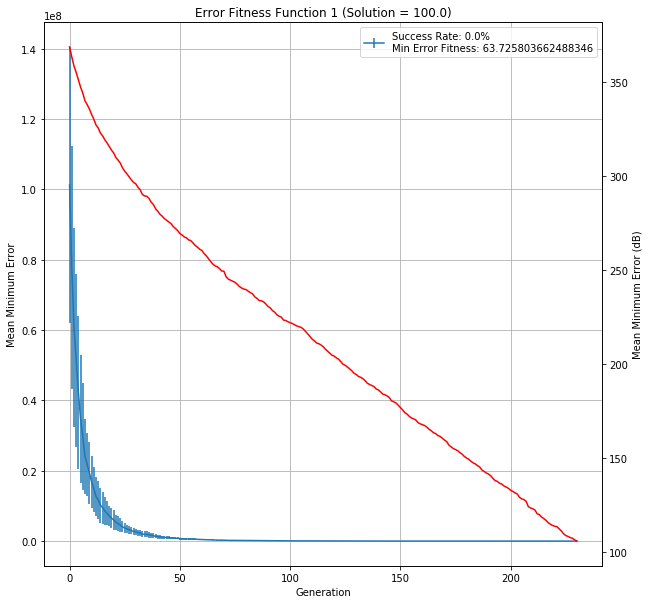

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_10_51_300_0.7_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,10,0.7,80.618256,171.886325,77.5247,273.978088,285.603952,111.121469,...,236.56357,144.508369,135.025346,345.474812,87.811268,129.056935,217.134153,198.548713,2:34:55,69900
